In [1]:
import os
import urllib.request
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from robustipy.models import OLSRobust
from robustipy.utils import get_colormap_colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns

n_draws = 50

In [ ]:
def figure_plotter(results_a, results_b, fig_name):
    plt.rcParams['font.family'] = 'Helvetica'
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 10))

    colors = get_colormap_colors('Spectral_r', 5, brightness_threshold=0.8)
    dfa = results_a.summary_df.sort_values('median').reset_index(drop=True)
    dfb = results_b.summary_df.sort_values('median').reset_index(drop=True)


    ax1.plot(dfa.index, dfa['median'], label='Promotion Condition', color=colors[0])
    ax1.fill_between(dfa.index, dfa['ci_down'], dfa['ci_up'], color=colors[0], alpha=0.15)
    ax1.plot(dfb.index, dfb['median'], label='Prevention Condition', color=colors[3])
    ax1.fill_between(dfb.index, dfb['ci_down'], dfb['ci_up'], color=colors[3], alpha=0.15)
    ax1.set_xlabel('Model Rank', fontsize=16)
    ax1.set_ylabel('Estimate', fontsize=16)
    ax1.set_title('a.', loc='left', fontsize=18, y=1.025, x=-0.075)
    ax1.spines['bottom'].set_position(('outward', 10))
    ax1.spines['left'].set_position(('outward', 10))
    ax1.legend()
    ax1.tick_params(labelsize=12)
    ax1.set_ylim(-0.6, 0.625)
    ax1.grid(True, axis='both', linestyle=(0, (2, 6)),
             linewidth=0.74, alpha=0.3, color='k', zorder=3)

    ax2.plot(df2a.index, df2a['median'], label='Promotion Condition', color=colors[0])
    ax2.fill_between(df2a.index, df2a['ci_down'], df2a['ci_up'], color=colors[0], alpha=0.15)
    ax2.plot(df2b.index, df2b['median'], label='Prevention Condition', color=colors[3])
    ax2.fill_between(df2b.index, df2b['ci_down'], df2b['ci_up'], color=colors[3], alpha=0.15)
    ax2.set_ylabel('Estimate', fontsize=16)
    ax2.set_xlabel('Model Rank', fontsize=16)
    ax2.legend()
    ax2.spines['bottom'].set_position(('outward', 10))
    ax2.spines['left'].set_position(('outward', 10))
    ax2.set_title('b.', loc='left', fontsize=18, y=1.025, x=-0.075)
    ax2.tick_params(labelsize=12)
    ax2.set_ylim(-0.6, 0.625)
    ax2.grid(True, axis='both', linestyle=(0, (2, 6)),
             linewidth=0.74, alpha=0.3, color='k', zorder=3)



    legend_elements1 = [Patch(facecolor=colors[0], edgecolor='k',
                              label=r'Promotion (CI)', alpha=0.7),
                        Line2D([0], [0], color=colors[0], lw=1, linestyle='-',
                               label=r'Promotion (Med.)', alpha=0.7),
                        Patch(facecolor=colors[3], edgecolor='k',
                              label=r'Prevention (CI)', alpha=0.7),
                        Line2D([0], [0], color=colors[3], lw=1, linestyle='-',
                               label=r'Prevention (Med.)', alpha=0.7)]

    ax1.legend(handles=legend_elements1, loc='upper left', frameon=True,
               fontsize=9, framealpha=1, facecolor='w', ncols=2,
               edgecolor=(0, 0, 0, 1), title='Published Data',
               )

    legend_elements2 = [Patch(facecolor=colors[0], edgecolor='k',
                              label=r'Promotion (CI)', alpha=0.7),
                        Line2D([0], [0], color=colors[0], lw=1, linestyle='-',
                               label=r'Promotion (Med.)', alpha=0.7),
                        Patch(facecolor=colors[3], edgecolor='k',
                              label=r'Prevention (CI)', alpha=0.7),
                        Line2D([0], [0], color=colors[3], lw=1, linestyle='-',
                               label=r'Prevention (Med.)', alpha=0.7)]
    ax2.legend(handles=legend_elements2, loc='upper left', frameon=True,
               fontsize=9, framealpha=1, facecolor='w', ncols=2,
               edgecolor=(0, 0, 0, 1), title='Reconstructed Data',
               )
    plt.tight_layout()
    sns.despine()
    plt.savefig("./figures/" + fig_name + '.pdf', bbox_inches='tight')
    plt.savefig("./figures/" + fig_name + '.png', bbox_inches='tight', dpi=400)
    plt.savefig("./figures/" + fig_name + '.svg', bbox_inches='tight')
    

In [3]:
data = pd.read_csv('./data/1_3_prep_mcs_data.csv')

/tmp/ipykernel_223678/728670720.py:1: DtypeWarning: Columns (2098) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/1_3_prep_mcs_data.csv')


In [4]:
data

,Unnamed: 0,mcsid,fcnum00,fccsex00,fccdbm00,fccdby00,fccage00,fcversb0,fclscsb0,fclmnsb0,...,fcwuwk00r,sleeptime,hand,fccycf00r,fcglas00r,fcares00r,fccybu00r,fchurt00r,fccanb00r,fcalfv00r
0,1,M10002P,1,1,3,2001,13,101.0,1241.0,21.0,...,7.5,9.0,0.0,4.0,0.0,0.0,1.0,2.0,0.0,NaN
1,2,M10007U,1,1,10,2000,14,102.0,941.0,16.0,...,7.5,9.0,0.0,5.0,0.0,0.0,2.0,2.0,0.0,0.0
2,3,M10015U,1,2,5,2001,13,102.0,1539.0,26.0,...,7.5,9.0,0.0,5.0,0.0,0.0,1.0,2.0,0.0,0.0
3,4,M10016V,1,1,11,2000,14,102.0,964.0,16.0,...,7.5,9.0,0.0,6.0,0.0,0.0,1.0,1.0,0.0,NaN
4,5,M10018X,1,2,7,2001,13,102.0,973.0,16.0,...,6.5,8.0,0.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,11855,M35868P,1,1,11,2000,14,103.0,896.0,15.0,...,7.5,7.0,0.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0
11855,11856,M35869Q,1,2,10,2001,14,103.0,1099.0,18.0,...,7.5,9.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0
11856,11857,M35872K,1,2,12,2000,14,102.0,1022.0,17.0,...,7.5,10.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
11857,11858,M35873L,1,2,10,2000,14,102.0,1182.0,20.0,...,7.5,7.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0


In [49]:
y = ["fcmdsa00r",
    "fcmdsb00r",
    "fcmdsc00r",
    "fcmdsd00r",
    "fcmdse00r",
    "fcmdsf00r",
    "fcmdsg00r",
    "fcmdsh00r",
    "fcmdsi00r",
    "fcmdsj00r",
    "fcmdsk00r",
    "fcmdsl00r",
    "fcmdsm00r",
    "fcsati00r",
    "fcgdql00r",
    "fcdowl00r",
    "fcvalu00r",
    "fcgdsf00r",
    "fcscwk00r",
    "fcwylk00r",
    "fcfmly00r",
    "fcfrns00r",
    "fcschl00r",
    "fclife00r",
    ]
x = [
    "fccomh00r"
]
c= []

orben_1 = OLSRobust(y=y, x=x, data=data)
orben_1.fit(controls=c, draws=n_draws, composite_sample=100)
orben_1_results = orben_1.get_results()

/home/daniel/code/robustipy/src/robustipy/prototypes.py:128: MissingValueWarning: Missing values found in data. Listwise deletion will be applied.
  warnings.warn(


Calculating Composite Ys


Output()

[OLSRobust] Running with n_cpu=7, draws=50


In [50]:
out = orben_1_results.summary_df.sort_values('median').reset_index(drop=True)

<Axes: >

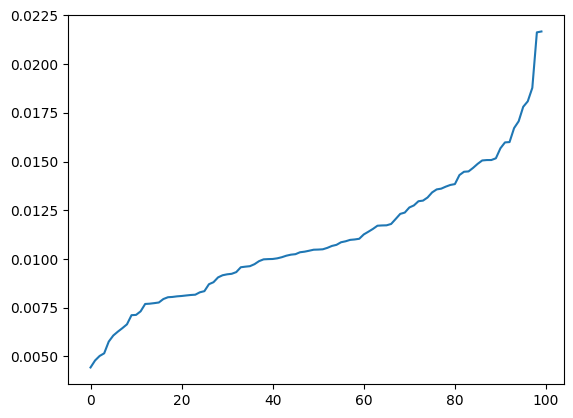

In [51]:
out['median'].plot()